<a href="https://colab.research.google.com/github/Iddhie/github-slideshow/blob/main/shop_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#from google.colab import drive
#drive.mount('/content/gdrive')
filename = "/content/gdrive/MyDrive/Colab Notebooks/Customers.csv"

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv(filename)
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [5]:
# Remove unnessary columns
df_processed = df.drop(["CustomerID"], axis=1)
df_processed.head(5)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


In [6]:
# Check for missing data
df_processed.isnull().sum(axis=0)

Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [7]:
#since we have the profession column with alot of null values, we will drop those rows
df_processed = df_processed.dropna(subset=["Profession"])

df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [8]:
#Check if there are any other nulls
df_processed.isnull().sum(axis=0)

Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [9]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  1965 non-null   object
 1   Age                     1965 non-null   int64 
 2   Annual Income ($)       1965 non-null   int64 
 3   Spending Score (1-100)  1965 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         1965 non-null   int64 
 6   Family Size             1965 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 122.8+ KB


Lets visualise the dataset we have to get a better understanding and potentially identify patterns and trends

<Figure size 432x288 with 0 Axes>

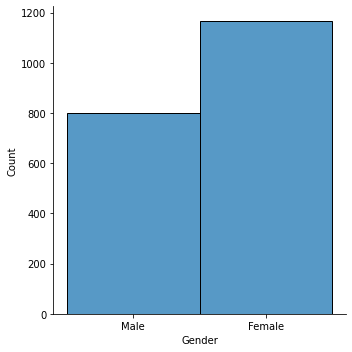

<Figure size 432x288 with 0 Axes>

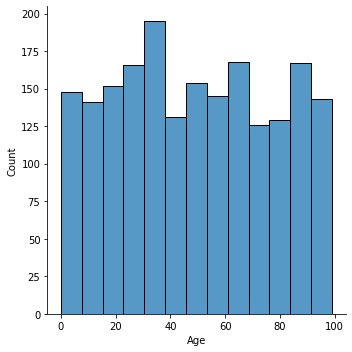

<Figure size 432x288 with 0 Axes>

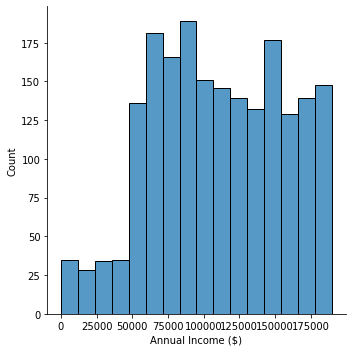

<Figure size 432x288 with 0 Axes>

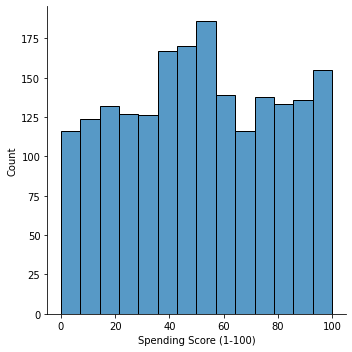

<Figure size 432x288 with 0 Axes>

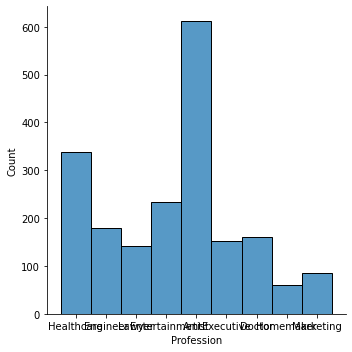

<Figure size 432x288 with 0 Axes>

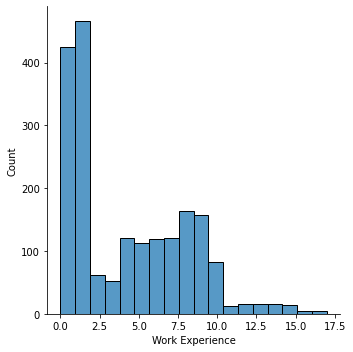

<Figure size 432x288 with 0 Axes>

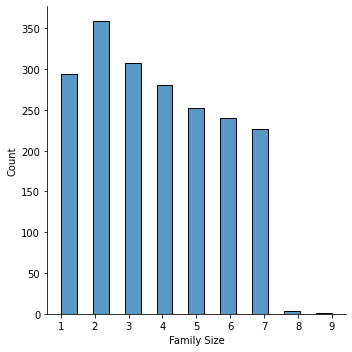

In [10]:
# Visualise distribution of dataframe data
for column in df_processed.columns:
    plt.figure()
    sns.displot(df_processed, x=column)
    plt.show()

Next step of the process is to convert the non-numerical and non-ordinal data into binary type data. Here I have identified the gender of the customer and the Profession to be non-numerical and non-ordinal. Hnece they will be converted to binary.


In [11]:
# One-hot encode the categorical features
df_encoded = pd.get_dummies(df_processed, columns=['Gender', 'Profession'])
df_encoded.columns

Index(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience',
       'Family Size', 'Gender_Female', 'Gender_Male', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing'],
      dtype='object')

In [12]:
# check for summary of features
df_encoded.describe()
     

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,48.894656,110616.009669,51.078880,4.092621,3.757252,0.593384,0.406616,0.311450,0.081934,0.091094,0.119084,0.077863,0.172519,0.030534,0.072265,0.043257
std,28.414889,45833.860195,27.977176,3.926459,1.968335,0.491327,0.491327,0.463204,0.274334,0.287816,0.323970,0.268023,0.377927,0.172096,0.258991,0.203487
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,74350.000000,28.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,109759.000000,50.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.000000,149095.000000,75.000000,7.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Next, we will visualize the data matrix using a heatmap to easily understand the highly and loosely correlated values.

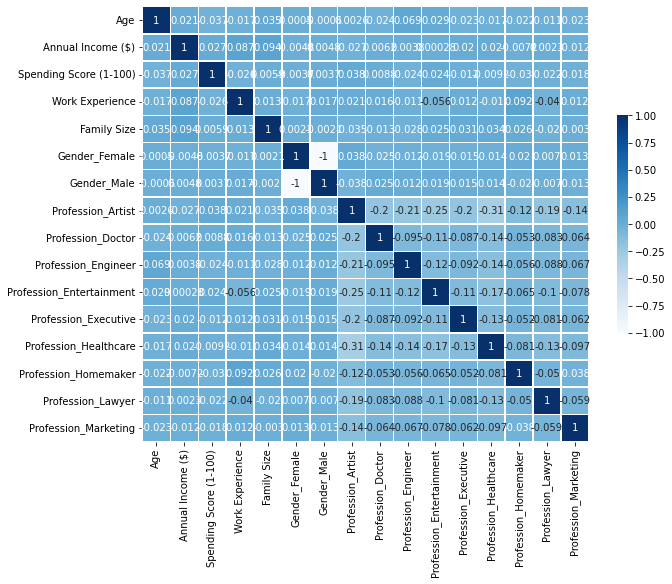

In [18]:
# Set the figure size
corr = df_encoded.corr()
plt.figure(figsize=(10, 8))
# Create the heatmap with higher resolution
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2g', linewidths=0.5, cbar_kws={'shrink': 0.5})

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [28]:

## Create X features set and y outcome set
X = df_encoded.drop("Spending Score (1-100)", axis=1)
y = df_encoded["Spending Score (1-100)"]


In [29]:

#Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Splitting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)


In [30]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# Train the model using the training set
knn.fit(X_train, y_train)

# Evaluate the model on the validation set
val_accuracy = knn.score(X_val, y_val)
print("Validation Accuracy of Model 1: {:.2f}%".format(val_accuracy * 100))

Validation Accuracy of Model 1: 0.51%


In [34]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='manhattan')
knn.fit(X_train, y_train)
val_accuracy = knn.score(X_val, y_val)
print("Validation Accuracy of Model with Manhattan distance: {:.2f}%".format(val_accuracy * 100))


Validation Accuracy of Model with Manhattan distance: 0.51%


In [35]:

# Predict y values for the validation set
y_pred = knn.predict(X_val)

# Calculate model fit parameters for the validation set
print("Validation Accuracy of Model 1: {:.2f}%".format(accuracy_score(y_val, y_pred) * 100))
print("Validation Precision of Model 1: {:.2f}%:".format(precision_score(y_val, y_pred, average='macro') * 100))
print("Validation Recall of Model 1: {:.2f}%".format(recall_score(y_val, y_pred, average='macro') * 100))
print("Validation F1-score of Model 1: {:.2f}%".format(f1_score(y_val, y_pred, average='macro') * 100))



Validation Accuracy of Model 1: 0.51%
Validation Precision of Model 1: 0.31%:
Validation Recall of Model 1: 0.58%
Validation F1-score of Model 1: 0.35%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Import the necessary libraries
from sklearn.decomposition import PCA

# Create a PCA object and fit it to your data
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# Train the model using the transformed training set
knn.fit(X_train_pca, y_train)

# Evaluate the model on the transformed validation set
val_accuracy = knn.score(X_val_pca, y_val)
print("Validation Accuracy of Model with PCA: {:.2f}%".format(val_accuracy * 100))

Validation Accuracy of Model with PCA: 0.51%


As we see, the validation accuracy of the model is extremely low, hence we will reduce the model features

In [40]:


# Reduce model features to simplify the model (Model 2)
# Remove arrival_year arrival_date in addition to Booking_ID
df2_encoded = df_processed.drop(["Profession", "Work Experience"], axis=1)
# Convert non-numerical and non ordinal features to binary type
df2_encoded = pd.get_dummies(df2_encoded, columns=['Gender'], drop_first=True)
df2_encoded.columns
     


Index(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size',
       'Gender_Male'],
      dtype='object')

In [41]:
## Create X features set and y outcome set
X = df2_encoded.drop("Spending Score (1-100)", axis=1)
y = df2_encoded["Spending Score (1-100)"]
#Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Splitting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# Train the model using the training set
knn.fit(X_train, y_train)

# Evaluate the model on the validation set
val_accuracy = knn.score(X_val, y_val)
print("Validation Accuracy of Model 2: {:.2f}%".format(val_accuracy * 100))

Validation Accuracy of Model 2: 0.51%


As you can see, thi shit didnt work, im starting a nother project.